In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df_dsa = pd.read_csv('dataset.csv')

In [ ]:
df_dsa.shape

(9700, 11)

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [ ]:
# Verificando o conjunto de colunas do dataset
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
# Verificando o tipo de dados de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [ ]:
# Resumo estatistico da coluna 'Valor_Venda'
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
# Verificando se há valores duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [ ]:
# Verificando se há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [ ]:
df_dsa['Categoria'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
# My soluction
# Pergunta de Negócio 1:
# Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

# 1 - Isolando as modalidades de categoria, deixando somente 'Office Supplies'
vendas_office_supplies = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

# 2 - Calculando a soma de 'Valor_Venda' por Cidade no DataSet
cidades = vendas_office_supplies.groupby('Cidade')['Valor_Venda'].sum()

# 3 - Selecionando a de maior venda
maior_venda = cidades.idxmax()
valor_venda = cidades.max()

print(f'A cidade com maior numero de vendas foi: {maior_venda} realizando ${valor_venda} em vendas.' )

A cidade com maior numero de vendas foi: New York City realizando $68362.814 em vendas.


In [ ]:
# A data está desorganizada, vamos definir a coluna como data para que o matplotlib reconheça
# e crie o grafico em série temporal.
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])

<ipython-input-119-0825e54c150a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])


In [ ]:
# Pergunta de Negócio 2:
# Qual o Total de Vendas Por Data do Pedido?
# Demonstre o resultado através de um gráfico de barras.

# Separando o a coluna de 'data_pedido' por 'valor_venda' total
df_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
df_p2.head()

Data_Pedido
2015-01-02     468.900
2015-01-03    2203.151
2015-01-04     119.888
2015-01-06    5188.520
2015-01-07     601.024
Name: Valor_Venda, dtype: float64

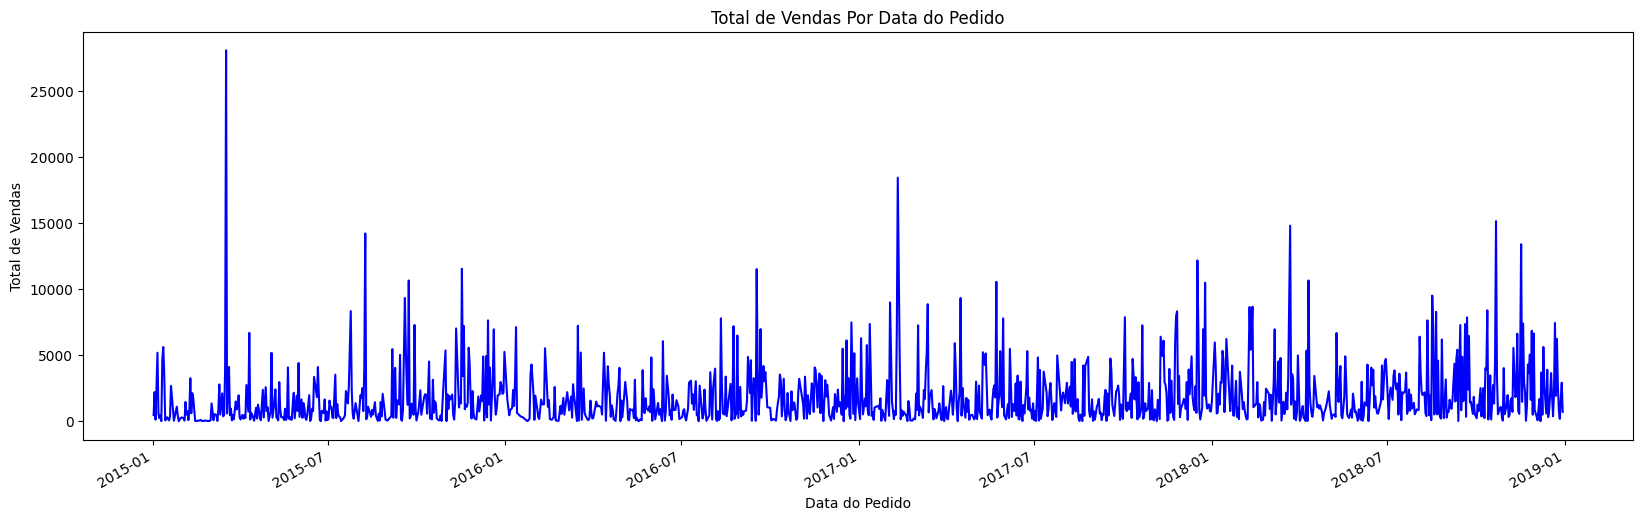

In [ ]:
# Criando o gráfico com matplotlib
plt.figure(figsize=(20,6))
df_p2.plot(x='Data_Pedido', y='Valor_Venda', color='blue')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

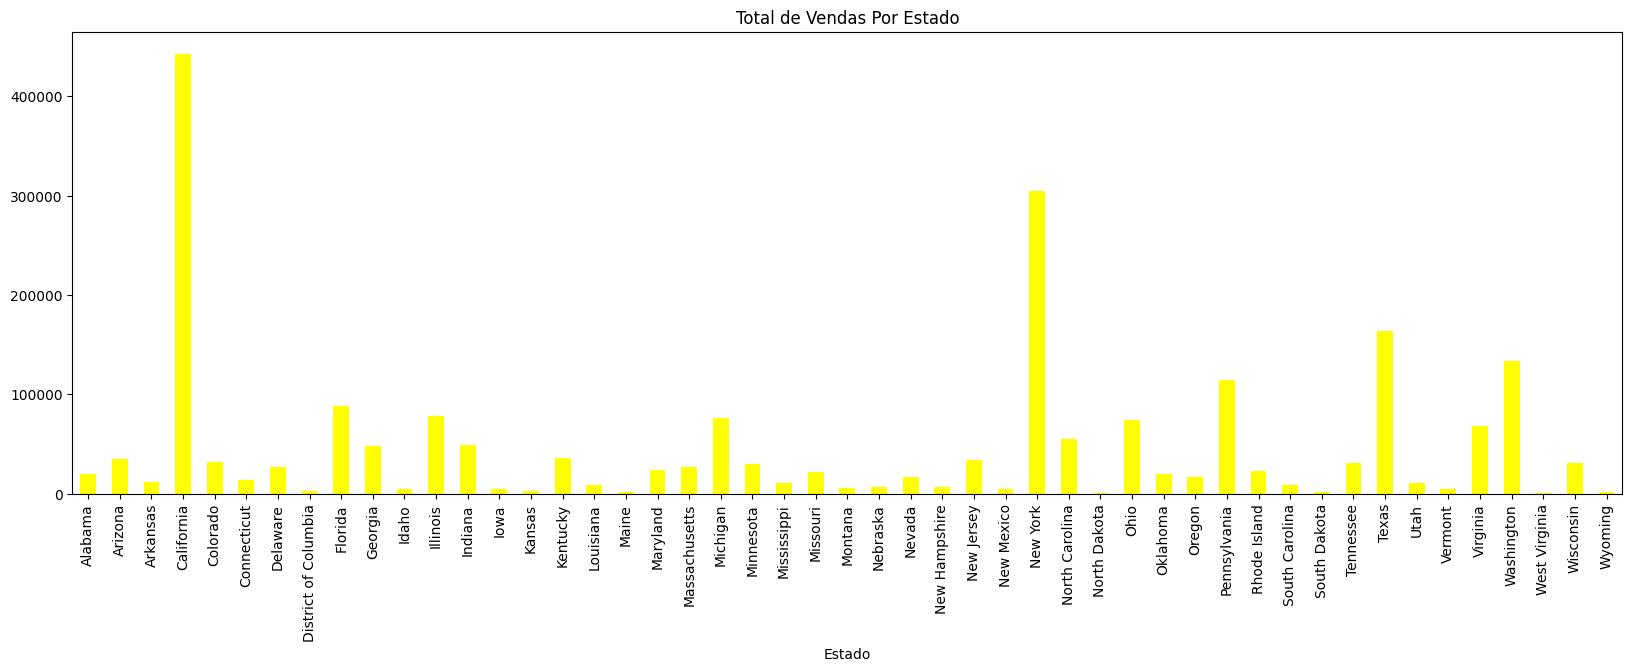

In [ ]:
# Pergunta de Negócio 3:
# Qual o Total de Vendas por Estado?
# Demonstre o resultado através de um gráfico de barras.

df_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum()
plt.figure(figsize=(20,6))
df_p3.plot(kind ='bar',x='Estado',y="Valor_Venda",color='yellow')
plt.title('Total de Vendas Por Estado')
plt.show()


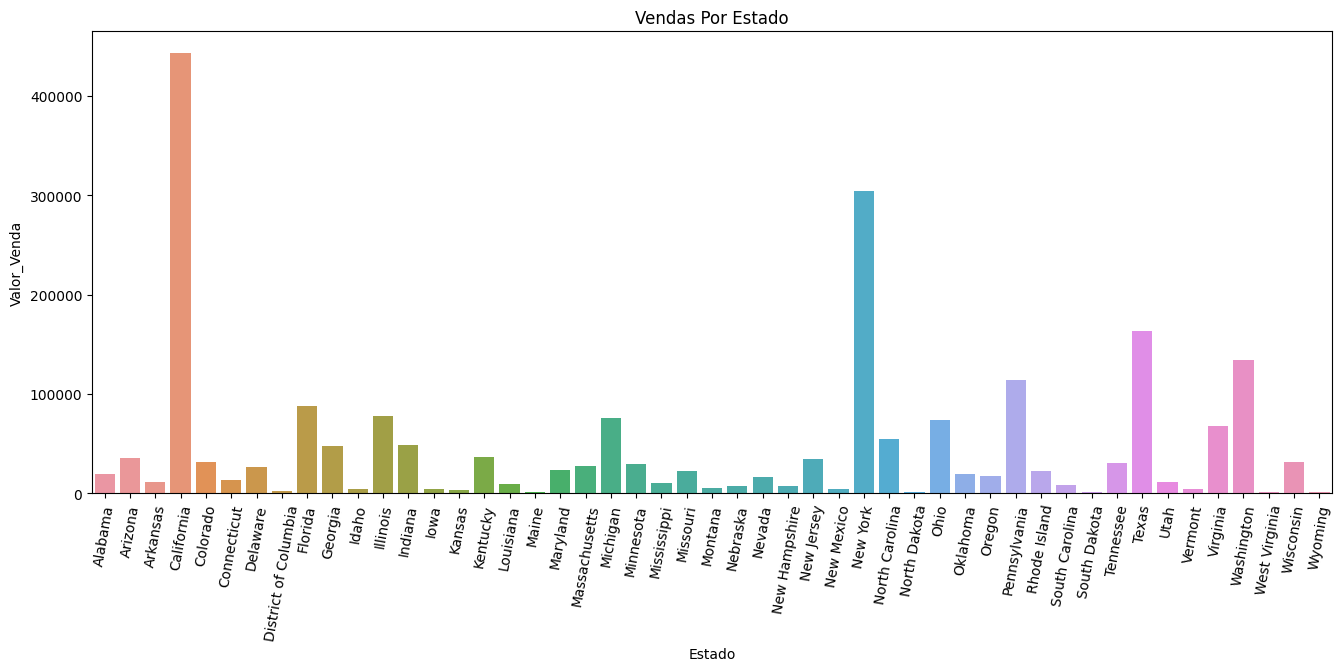

In [ ]:
# Plot

df_dsa_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
plt.figure(figsize = (16, 6))
sns.barplot(data = df_dsa_p3,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

In [ ]:
# Pergunta de Negócio 4:
# Quais São as 10 Cidades com Maior Total de Vendas?
# Demonstre o resultado através de um gráfico de barras.

In [ ]:
df_p2.head(10)

Data_Pedido
2015-01-02     468.900
2015-01-03    2203.151
2015-01-04     119.888
2015-01-06    5188.520
2015-01-07     601.024
2015-01-08     228.328
2015-01-09     469.436
2015-01-10       4.710
2015-01-11    4637.816
2015-01-12    5624.390
Name: Valor_Venda, dtype: float64

In [ ]:
# Criando um data set somente com cidades, a partir do valor de vendas
df_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum()
# Ordenando por ordem decrescente, apenas as 10 primeiras linhas.
top_10_cidades = df_p4.sort_values(ascending=False).head(10)
top_10_cidades.head(10)


Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64

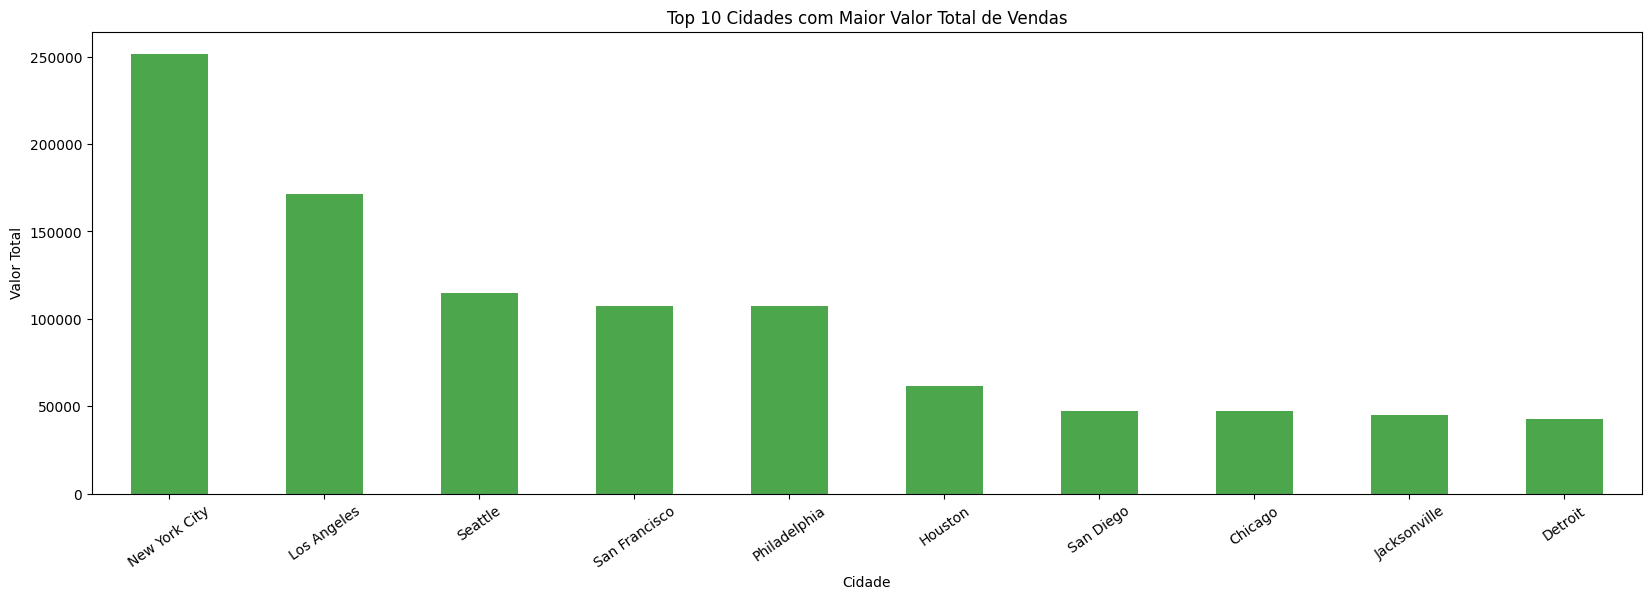

In [ ]:
plt.figure(figsize=(20,6))
top_10_cidades.plot(kind='bar', x='Cidade', y='Valor_Total', color='Green', alpha=0.7)
plt.xticks(rotation=35)
plt.xlabel('Cidade')
plt.ylabel('Valor Total')
plt.title('Top 10 Cidades com Maior Valor Total de Vendas')

plt.show()

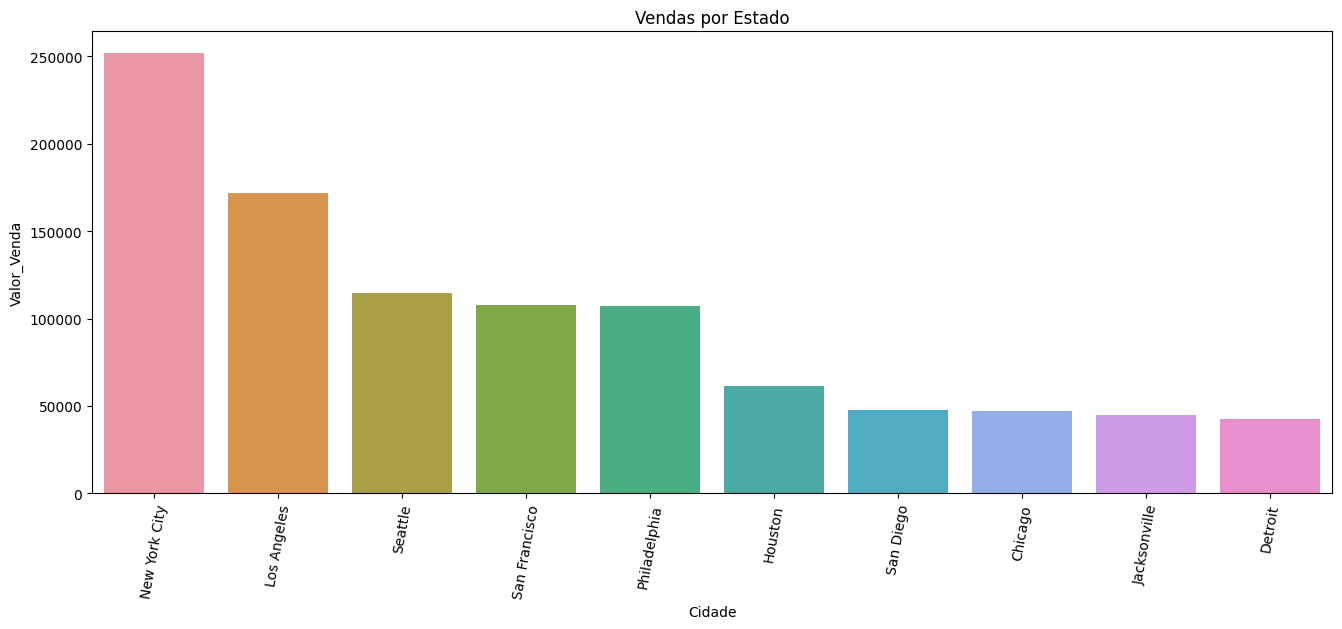

In [ ]:
top_10_cidades = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by="Valor_Venda", ascending=False).head(10)
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = top_10_cidades,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

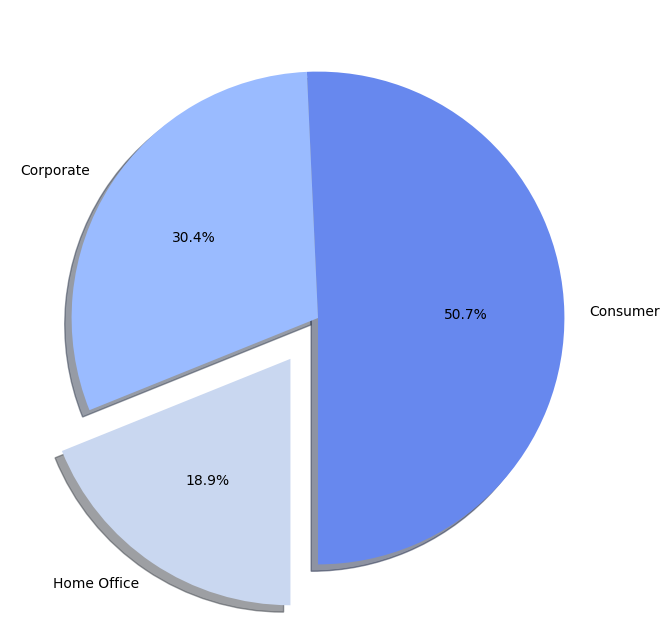

In [ ]:
# Pergunta de Negócio 5:
# Qual Segmento Teve o Maior Total de Vendas?
# Demonstre o resultado através de um gráfico de pizza.

df_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum()
max_segmento = df_p5.idxmax()
plt.figure(figsize=(8,8))
plt.pie(df_p5, labels=df_p5.index, autopct='%1.1f%%', startangle=270, explode= (0,0,0.2), shadow=True)
plt.show()

In [ ]:
df_dsa_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)

In [ ]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

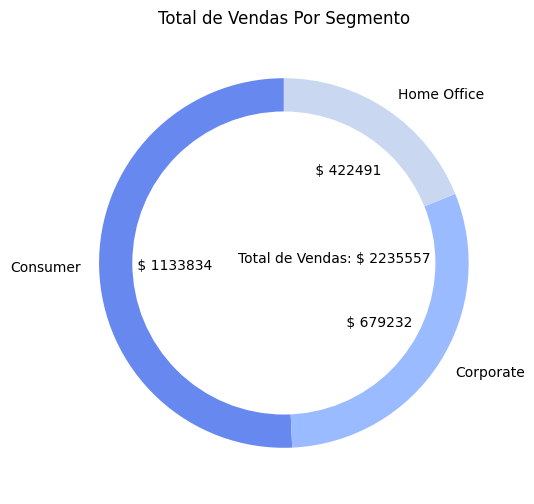

In [ ]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_dsa_p5['Valor_Venda'],
        labels = df_dsa_p5['Segmento'],
        autopct = autopct_format(df_dsa_p5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

In [ ]:
# Pergunta de Negócio 6 (Desafio Nível Baby):
# Qual o Total de Vendas Por Segmento e Por Ano?
# df_dsa.head()
teste_data = '2017-08-11'
print(teste_data[:4])

# Criando uma nova coluna de dados chamada 'Ano' e atribuindo a ela a separação da coluna 'Data_Pedido' com o metodo dt. (datetime) para acessar o ano (year)
df_dsa['Ano'] = df_dsa["Data_Pedido"].dt.year
df_dsa.head()


2017


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [ ]:
df_p6 = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
df_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

In [ ]:
# Pergunta de Negócio 7 (Desafio Nível Júnior):
# Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

# Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
# Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
# Quantas Vendas Receberiam 15% de Desconto?
df_dsa['Desconto'] = df_dsa['Valor_Venda'].apply(lambda x: 0.15 if x > 1000 else 0.10)
df_dsa.head()
df_dsa.Desconto.value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [ ]:
# Gabarito:
# Cria uma nova coluna de acordo com a regra definida acima
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [ ]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [ ]:
# Pergunta de Negócio 8 (Desafio Nível Master):
# Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
df_dsa.Valor_Venda.describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
# Selecionando as vendas somente onde há 15% de desconto

df_dsa['New_Value'] = df_dsa['Valor_Venda'].apply(lambda x: x-(x*0.15) if x > 1000 else x-(x*0.1))
df_dsa['New_Value'].describe()


count     9700.000000
mean       202.436402
std        535.402727
min          0.399600
25%         15.523200
50%         48.844800
75%        188.939250
max      19242.708000
Name: New_Value, dtype: float64

In [ ]:
# Selecionando as vendas somente onde há 15% de desconto, mantendo a tabela
df_p8 = df_dsa.loc[df_dsa['Desconto'] == 0.15]
df_p8

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,New_Value
10,CA-2015-115812,2015-09-06,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015,0.15,1450.2564
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016,0.15,887.9355
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016,0.15,2620.9155
35,CA-2017-117590,2017-08-12,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017,0.15,932.9124
54,CA-2017-105816,2017-11-12,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017,0.15,875.4575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015,0.15,1384.4970
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016,0.15,3652.9974
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017,0.15,2895.6644
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017,0.15,2570.3388


In [ ]:
# Selecionando as vendas somente onde há 15% de desconto, coletando apenas resultados para analise
df_p8 = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']
df_p8.mean()

2116.8078153172864

In [ ]:
df_p8_desconto = df_p8.apply(lambda x: x*0.85)
df_p8_desconto.mean()

1799.2866430196934

In [ ]:
# Pergunta de Negócio 9 (Desafio Nível Master Ninja):
# Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
# Demonstre o resultado através de gráfico de linha.
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,New_Value,Mes
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,8
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,8
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,12
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,11
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,11


In [ ]:
df_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
df_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer     18469.0240  246.253653  56.064
         Corporate     4600.5920  153.353067  62.440
         Home Office   5758.6380  274.220857  45.480
     2   Consumer      7871.1020  174.913378  34.860
         Corporate     2253.0700   93.877917  40.950
...                          ...         ...     ...
2018 11  Corporate    23986.0962  247.279342  71.952
         Home Office  19043.2760  268.215155  56.560
     12  Consumer     31732.4178  182.370217  46.802
         Corporate    13941.2860  158.423705  44.855
         Home Office  11064.5080  190.767379  42.650

[144 rows x 3 columns]

In [ ]:
# Extraindo os niveis
anos = df_p9.index.get_level_values(0)
meses = df_p9.index.get_level_values(1)
segmentos = df_p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

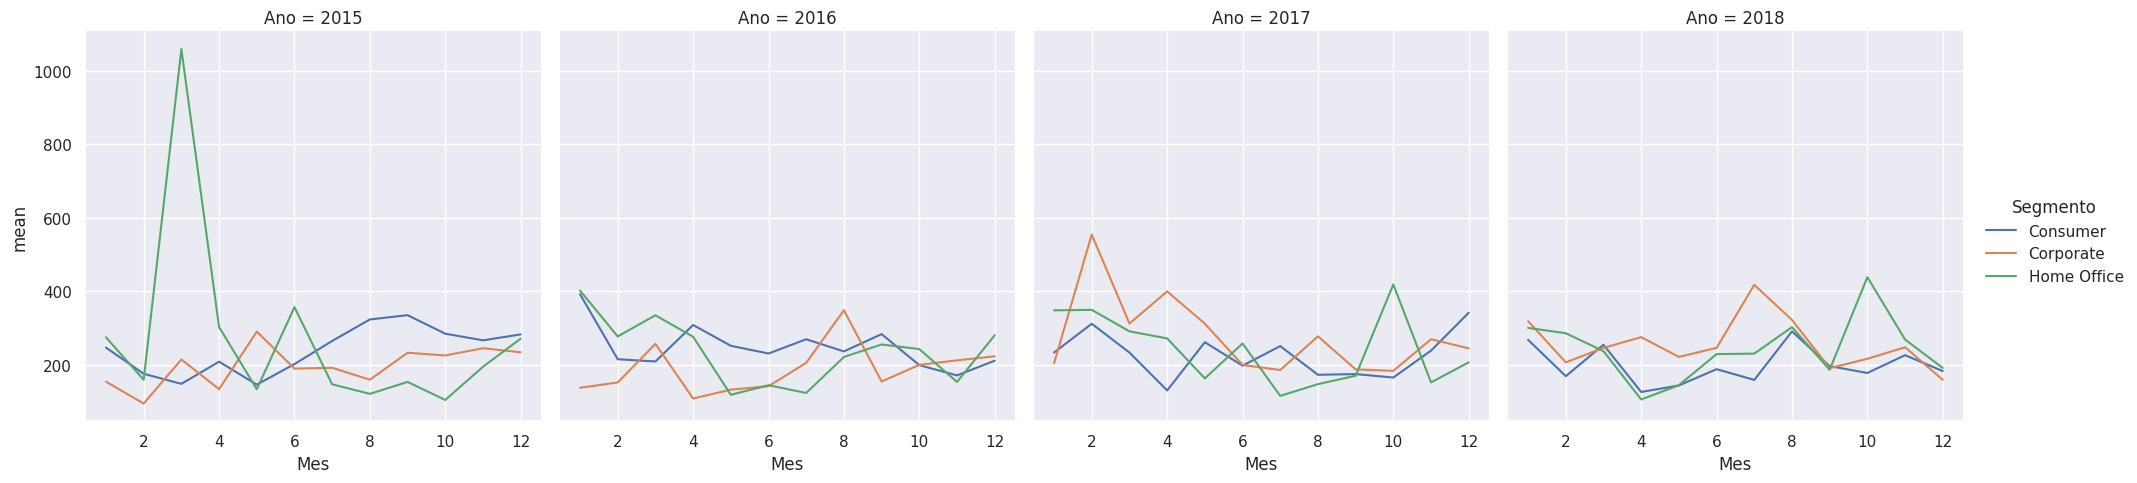

In [ ]:
# Plot
plt.figure(figsize=(12,6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_p9,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)
plt.show()

In [ ]:
# Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
# Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
# Demonstre tudo através de um único gráfico.

In [ ]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveus numéricas
df_p10 = df_dsa.groupby(['Categoria',
                          'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [ ]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_p10 = df_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [ ]:
df_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [ ]:
# Criamos outro dataframe somente com os totais por categoria
df_p10_cat = df_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [ ]:
# Dataframe com categorias
df_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [ ]:
  # Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [ ]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

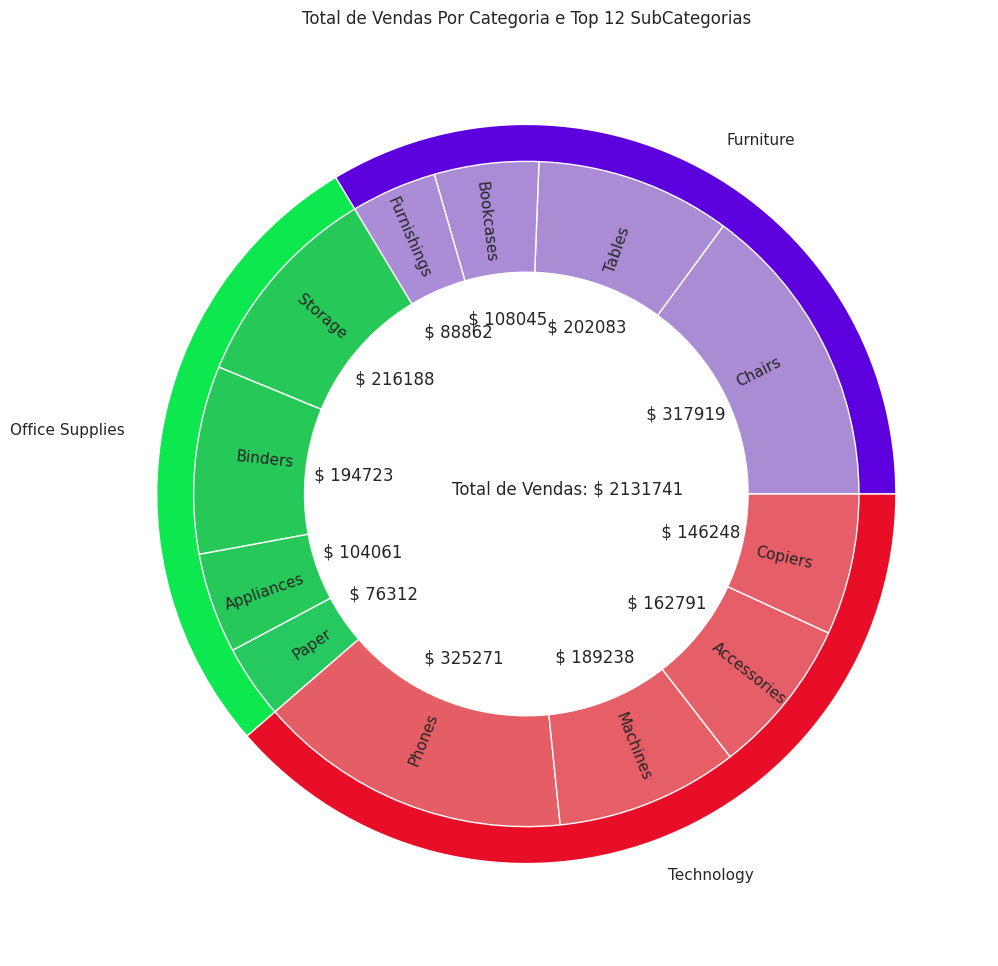

In [ ]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_p10_cat['Valor_Venda'],
            radius = 1,
            labels = df_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_p10['SubCategoria'],
            autopct = autopct_format(df_p10['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()